# Bivariate Plotting With Seaborn

In [1]:
import pandas as pd
import numpy as np
import os 

###  Load the Dataset

In [2]:
filename = os.path.join("/Users/salmanyagaka/Documents/interviews/adult.csv")
df = pd.read_csv(filename, header=0)

### Glance at the Data

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Get the Dimensions of the Dataset

In [4]:
df.shape

(48842, 15)

## Plot Multiple Variables Using `seaborn`

Load `matplotlib` and `seaborn` packages

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme() # this line activates a signature aesthetic that makes seaborn plots look better

###  Filter the Dataset

We will work with the following subset of our data: we will keep only 3 numeric features, one categorical feature, and one label.

The code cell below filters `df` into a new DataFrame `df_sub`, keeping only the following columns: `age`, `capital-gain`, `hours-per-week`, `education`, and the outcome `label`.

In [10]:
df = df.rename(columns={'income': 'label'})

df_sub= df[['age', 'capital-gain', 'hours-per-week', 'education','label']].copy() 
print(df_sub.head(10))
# Don't be alarmed by the sudden use of .copy() here!
# Adding it is not necessary. We could remove it, but then we would get some warnings down the line.
# The code would still run correctly either way.

   age  capital-gain  hours-per-week     education  label
0   25             0              40          11th  <=50K
1   38             0              50       HS-grad  <=50K
2   28             0              40    Assoc-acdm   >50K
3   44          7688              40  Some-college   >50K
4   18             0              30  Some-college  <=50K
5   34             0              30          10th  <=50K
6   29             0              40       HS-grad  <=50K
7   63          3103              32   Prof-school   >50K
8   24             0              40  Some-college  <=50K
9   55             0              10       7th-8th  <=50K


### Produce a Pairplot on the Numeric Features Using `seaborn`

Plotting a histogram of a given column is a common way to understand the distribution of this feature in your dataset. The code below accomplishes this using the `pairplot()` function from the `seaborn` package.

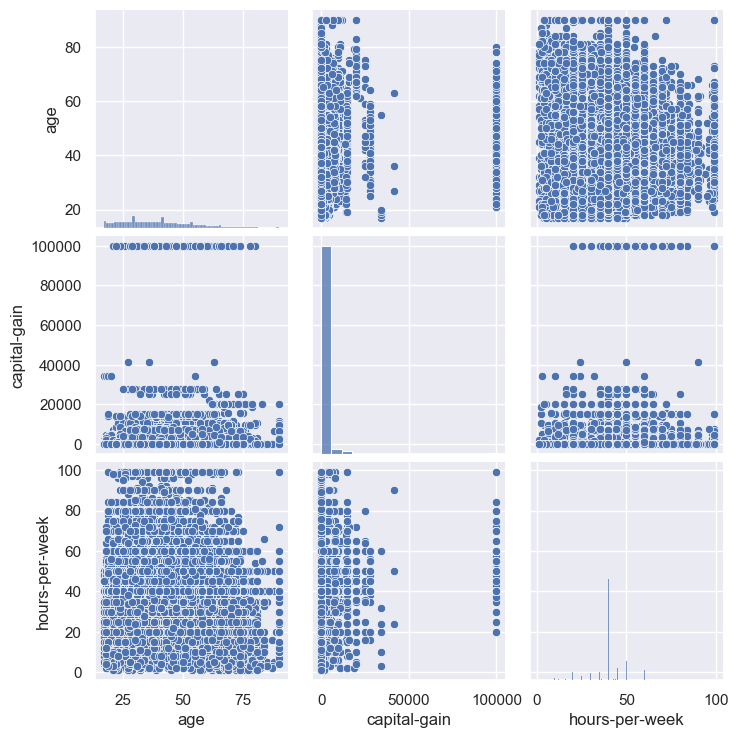

In [11]:
sns.pairplot(data=df_sub)

I'll explain each subplot in the pairplot grid systematically, going row by row from top to bottom, left to right.

## **TOP ROW (Age row)**

**Plot 1 (Top-left): Age vs Age (Diagonal)**
- This is a histogram showing the distribution of ages
- X-axis: Age (roughly 17-90 years)
- Y-axis: Frequency/count
- Shows age is fairly normally distributed with most people between 25-50 years old

**Plot 2: Age vs Capital-gain**
- X-axis: Age, Y-axis: Capital-gain
- Most dots are clustered at the bottom (capital-gain = 0)
- A few scattered dots show people with capital gains across different ages
- No clear age pattern for who has capital gains

**Plot 3: Age vs Hours-per-week**
- X-axis: Age, Y-axis: Hours-per-week
- Strong horizontal line at 40 hours (most people work full-time)
- Other horizontal lines at 20, 30, 50+ hours
- People of all ages work various hours, but 40 is most common

**Plot 4: Age vs Education**
- X-axis: Age, Y-axis: Education (encoded as numbers)
- Horizontal bands show discrete education levels
- All ages represented across education levels

**Plot 5: Age vs Label**
- X-axis: Age, Y-axis: Label (income category)
- Two horizontal bands (likely ≤50K and >50K income)
- Shows income distribution across ages

## **SECOND ROW (Capital-gain row)**

**Plot 6: Capital-gain vs Age**
- Same as Plot 2, but axes flipped
- Most dots on left side (capital-gain = 0)
- Shows the extreme skewness of capital-gain data

**Plot 7: Capital-gain vs Capital-gain (Diagonal)**
- Histogram of capital-gain distribution
- Extremely right-skewed - vast majority have 0 capital gains
- Few people with high capital gains create the long tail

**Plot 8: Capital-gain vs Hours-per-week**
- X-axis: Capital-gain, Y-axis: Hours-per-week
- Vertical line at capital-gain = 0 (most people)
- Few scattered points show people with capital gains work various hours

**Plot 9: Capital-gain vs Education**
- Most data clustered at capital-gain = 0
- People with capital gains span different education levels

**Plot 10: Capital-gain vs Label**
- Shows relationship between capital gains and income level
- People with higher capital gains might be more likely to have >50K income

## **THIRD ROW (Hours-per-week row)**

**Plot 11: Hours-per-week vs Age**
- Same as Plot 3, axes flipped

**Plot 12: Hours-per-week vs Capital-gain**
- Same as Plot 8, axes flipped

**Plot 13: Hours-per-week vs Hours-per-week (Diagonal)**
- Histogram showing work hours distribution
- Strong peak at 40 hours (full-time standard)
- Smaller peaks at 20, 30, 50+ hours
- Shows discrete, not continuous, work patterns

**Plot 14: Hours-per-week vs Education**
- Different education levels work various hours
- 40-hour work week is common across education levels

**Plot 15: Hours-per-week vs Label**
- Shows if work hours relate to income level
- Both income groups work various hours, but patterns may differ

## **FOURTH ROW (Education row)**

**Plot 16-19**: Show education relationships with other variables
- Education appears to be categorical (discrete levels)
- Creates horizontal bands in scatter plots

## **BOTTOM ROW (Label row)**

**Plot 20-24**: Show income label relationships
- Label has only 2 values (creating 2 horizontal bands)
- This confirms it's a binary classification target (≤50K vs >50K)

The key insight is that **capital-gain** is extremely skewed (most people have 0), **hours-per-week** has strong clustering at standard work hours, and **age** is fairly normally distributed. This helps inform data preprocessing and modeling decisions.

The pairwise scatter plots do not make obvious any straightforward relationships between the variables. It seems that `capital-gain` is concentrated at 0, so the fact that this variable has little variability may explain why we did not see strong correlation with, say, `age`. <br>
But can we conclude that the variables are independent by looking at the apparent lack of covariability between `age` and `hours-per-week`? We can make a new, better plot that will help establish this. In particular, we will modify the plot above to:
1. use two different colors based on the outcome (label) value.
2. decrease the size of the points to de-clutter the display and better see if a 'tilt' characteristic of correlated features is emerging.

(Note: recall that the label in our data signifies whether the salary for the observed individual is above $50K.)

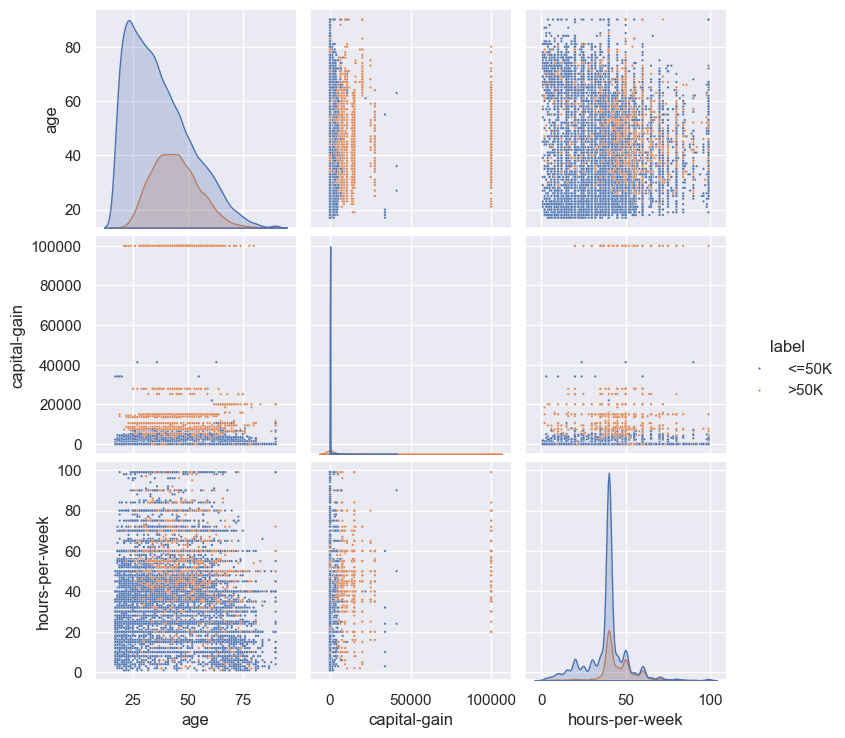

In [12]:
sns.pairplot(data=df_sub, hue = 'label', plot_kws={'s':3})

This version of the plot looks much better, in that it passes the 'sanity check' by meeting some of our expectations: for example, in the top-right corner we see that zero hours per week worked is common for extremely high and extremely low ends of the age range. This makes sense!<br>
It also makes sense that all of the 'outlier' points of very high capital gain are also points that have the '>50K' value of the label. 

### Produce a Bar Plot on the Categorical Feature (with y=label)

First, let's properly format our categorical feature `education` in `df_sub` by converting it to a `Pandas.Categorical` format. Do you remember how to do this? Run the cell below.

In [13]:
cat_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', 
             '9th', '10th', '11th', '12th', 'HS-grad', 
             'Prof-school', 'Assoc-acdm', 'Assoc-voc', 
             'Some-college', 'Bachelors', 'Masters', 'Doctorate']

df_sub['education'] = pd.Categorical(df_sub['education'], cat_order)

print(df_sub['education'])

0                11th
1             HS-grad
2          Assoc-acdm
3        Some-college
4        Some-college
             ...     
48837      Assoc-acdm
48838         HS-grad
48839         HS-grad
48840         HS-grad
48841         HS-grad
Name: education, Length: 48842, dtype: category
Categories (16, object): ['Preschool', '1st-4th', '5th-6th', '7th-8th', ..., 'Some-college', 'Bachelors', 'Masters', 'Doctorate']


Your objective is now to plot a histogram of all levels of `education` on the x-axis, with the counts of occurrences being on the y-axis, with one additional detail: split every bar into two parts of different colors, depending on the value of `label`. 
In other words, for every education level (for example, 'Bachelors'), the count bar should be part orange and part blue (these are the default colors), where the size of each part is the relative size of 'income >50K' to 'income<=50K' (among 'Bachelors').
You will need to use `hue` and `multiple` parameters of the `seaborn.histplot()` function. 
Inspect the code below to see how this is accomplished.

<Axes: xlabel='education', ylabel='Count'>

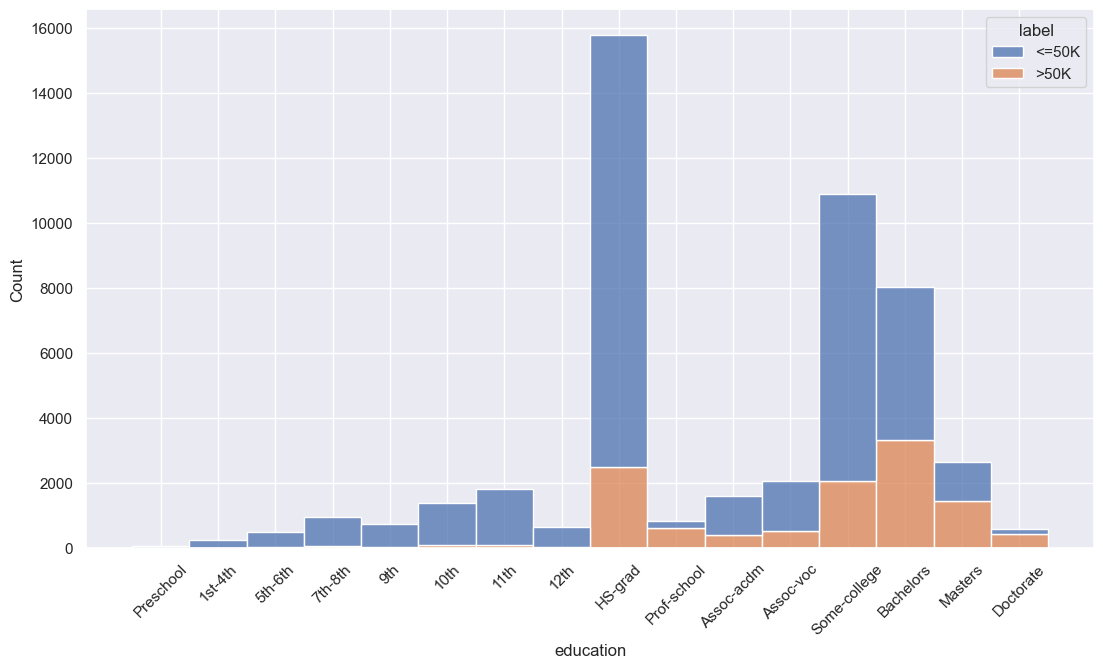

In [16]:
fig1 = plt.figure(figsize=(13,7)) 
t1 = plt.xticks(rotation=45)


sns.histplot(data=df_sub, x="education", hue='label',  multiple="stack")

In [18]:
df_sub['label'] = (df_sub['label'] =='>50K').astype(int)

In [19]:
df_sub

,age,capital-gain,hours-per-week,education,label
0,25,0,40,11th,0
1,38,0,50,HS-grad,0
2,28,0,40,Assoc-acdm,0
3,44,7688,40,Some-college,0
4,18,0,30,Some-college,0
...,...,...,...,...,...
48837,27,0,38,Assoc-acdm,0
48838,40,0,40,HS-grad,0
48839,58,0,40,HS-grad,0
48840,22,0,20,HS-grad,0


Another way to analyze the distribution between the two label classes for the data grouped by the education category is to use a `barplot()`:

<Axes: xlabel='education', ylabel='label'>

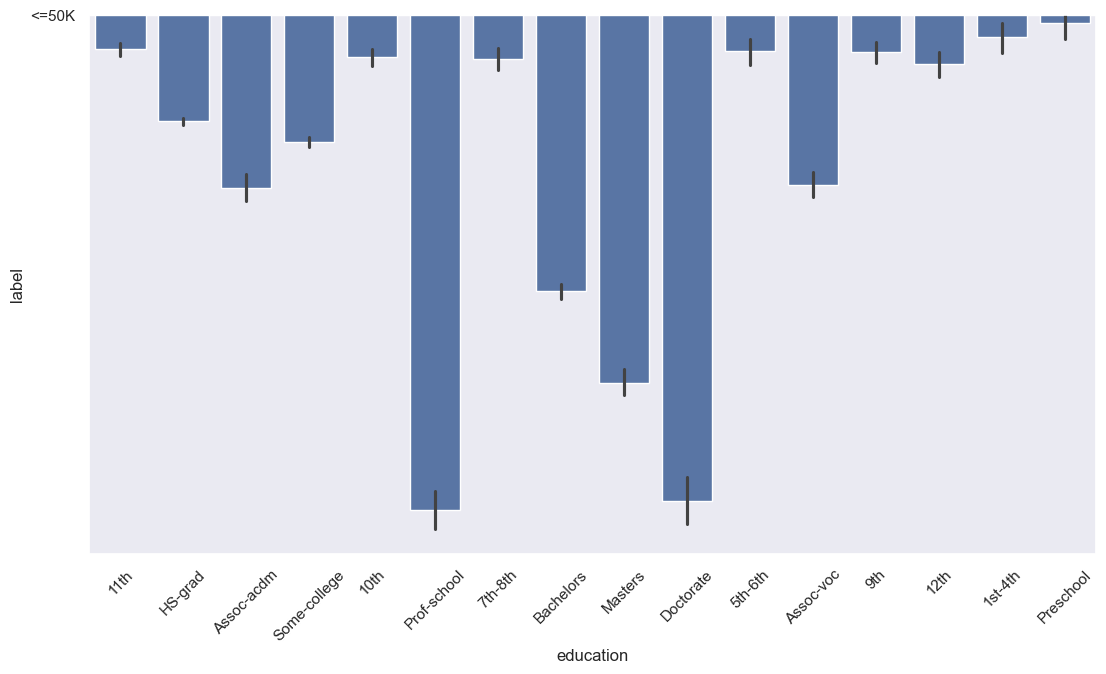

In [22]:
fig2 = plt.figure(figsize=(13,7)) 
t2 = plt.xticks(rotation=45)
sns.barplot(data = df, x='education', y='label')

Here, the y-axis represents the average class label for each educational category (that is, the average of all the 0 and 1 values encountered in a particular education group). 
Note: the black lines represent the 95% confidence interval.